### Implementation:

Define a 1D function, give inputs and plot:

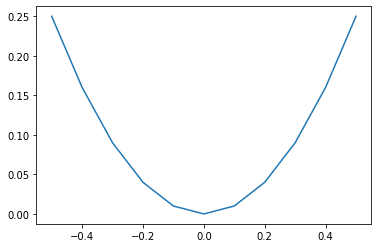

In [ ]:
# demonstrate simple x^2 function
from matplotlib import pyplot

# simple function
def calculate(x):
	return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

# calculate outputs
outputs = [calculate(x) for x in inputs]

# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

Define the same 1D function but provide random points as input, instead of linearly spaced points:

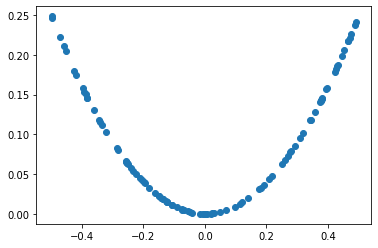

In [ ]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy.random import randn
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()

# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

Define and compile the discriminator model:

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 25)                75        
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


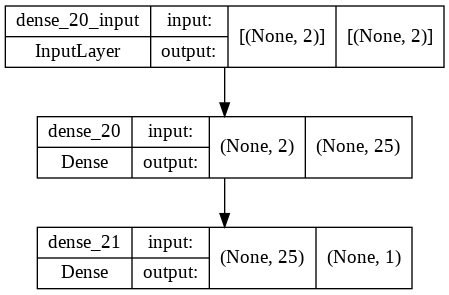

In [ ]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# define the discriminator model
discriminator = define_discriminator()

# summarize the model
discriminator.summary()

# plot the model
plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Modify the function *generate_samples* (defined earlier) to generate real samples and define each with label = 1, as we conider real samples as a class with label = 1.

In [ ]:
# import function to create an array of ones
from numpy import ones
from numpy import hstack

# generate n real samples with class labels
def generate_real_samples(n):
  
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  
  # generate outputs X^2
  X2 = X1 * X1
  
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  
  # generate class labels
  y = ones((n, 1))
  
  return X, y

Create a copy of the above function to generate fake samples and define each with label = 0, as we conider fake samples as a class with label = 0.

In [ ]:
# import function to create an array of zeros
from numpy import zeros

# generate n fake samples with class labels
def generate_fake_samples(n):
  
  # generate inputs in [-1, 1]
  X1 = -1 + rand(n) * 2
  
  # generate outputs in [-1, 1]
  X2 = -1 + rand(n) * 2
  
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  
  # generate class labels
  y = zeros((n, 1))
  
  return X, y

Training the discrimator batch-wise:

In [ ]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  
  # run epochs manually
  for i in range(n_epochs):
    
    # generate real examples
    X_real, y_real = generate_real_samples(half_batch)
   
    # update model
    model.train_on_batch(X_real, y_real)
   
    # generate fake examples
    X_fake, y_fake = generate_fake_samples(half_batch)
   
    # update model
    model.train_on_batch(X_fake, y_fake)
   
    # evaluate the model
    _, acc_real = model.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    
    # print after every 50 ietrations
    if (i+1) % 50 == 0:
      print(i+1, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()

# fit the model
train_discriminator(model)

50 0.5625 0.71875
100 0.3125 0.796875
150 0.515625 0.96875
200 0.5 0.96875
250 0.546875 0.96875
300 0.703125 0.921875
350 0.859375 1.0
400 0.765625 0.890625
450 0.890625 0.875
500 0.953125 0.859375
550 0.96875 0.96875
600 0.953125 0.9375
650 0.953125 0.828125
700 0.96875 0.765625
750 1.0 0.875
800 1.0 0.828125
850 1.0 0.9375
900 1.0 0.921875
950 1.0 0.8125
1000 1.0 0.8125


Defining the generator model:

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                90        
                                                                 
 dense_25 (Dense)            (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


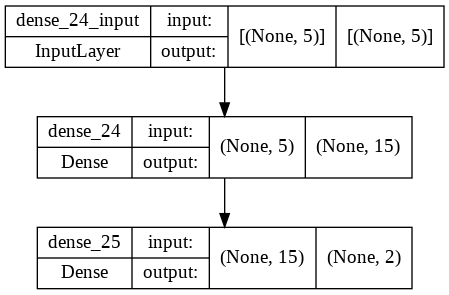

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# define the generator model
generator = define_generator(5)

# summarize the model
generator.summary()

# plot the model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Define points from the latent space for the generator:

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):

	# generate points in the latent space
	x_input = randn(latent_dim * n)
 
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

Using generator to generate fake samples and plot the result:

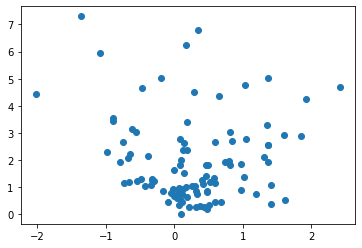

In [ ]:
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):

	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
 
	# predict outputs
	X = generator.predict(x_input)
 
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()
 
# size of the latent space
latent_dim = 5

# define the discriminator model
generator = define_generator(latent_dim)

# generate and plot generated samples
generate_fake_samples(generator, latent_dim, 100)

The above result does not make any sense as the generator has not been trained, yet.

Incorporating both into a single GAN model:

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):

	# make weights in the discriminator not trainable
	discriminator.trainable = False

	# connect them
	model = Sequential()
 
	# add generator
	model.add(generator)
 
	# add the discriminator
	model.add(discriminator)
 
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

Defining GAN model and summarizing:

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 2)                 122       
                                                                 
 sequential_11 (Sequential)  (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


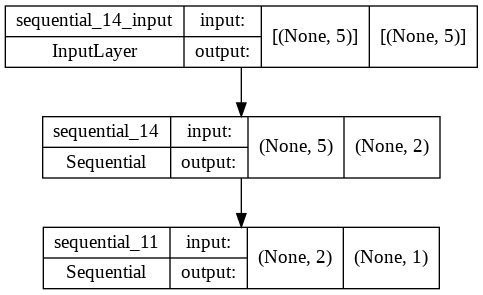

In [ ]:
# create the gan
gan_model = define_gan(generator, discriminator)

# summarize gan model
gan_model.summary()

# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Updating function to generate fake samples with class labels:

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):

	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
 
	# predict outputs
	X = generator.predict(x_input)
 
	# create class labels
	y = zeros((n, 1))
	return X, y

Evaluating discriminators accuracy for real and fake data, and plotting all the data points for visualization:

In [ ]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):

  # prepare real samples
  x_real, y_real = generate_real_samples(n)
 
  # evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
 
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
 
  # evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
 
  # prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n)
      
  # create inverted labels for the fake samples
  y_gan = ones((n, 1))
      
  # evaluate generator's accuracy and summarize
  acc_gen = generator.evaluate(x_gan, y_gan, verbose=0)
  print(epoch, " - Generator: ", acc_gen)
 
  # summarize discriminator performance
  print("Discriminator: ", acc_real, acc_fake)
  print()
 
  # scatter plot real and fake data points
  pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
  pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
  pyplot.show()

Training GAN, both discriminator and generator, in phases I and II:

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):

  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  # compile generator
  g_model.compile(loss='binary_crossentropy', optimizer='adam')  

  # manually enumerate epochs
  for i in range(n_epochs):
   
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
      
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

    # update discriminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
      
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
      
    # create inverted labels for the fake samples
    y_gan = ones((n_batch, 1))
      
    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)
      
    # evaluate the model every n_eval epochs
    if (i+1) % n_eval == 0:
      summarize_performance(i, g_model, d_model, latent_dim)

1999  - Generator:  6.198914051055908
Discriminator:  0.38999998569488525 0.7099999785423279



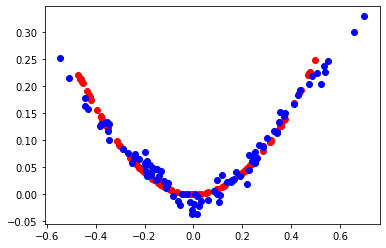

3999  - Generator:  5.63686990737915
Discriminator:  0.6200000047683716 0.5



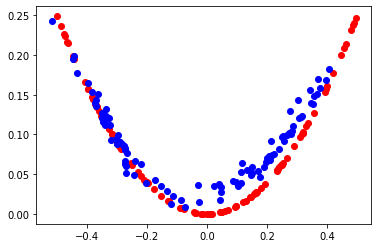

5999  - Generator:  6.127997398376465
Discriminator:  0.49000000953674316 0.4699999988079071



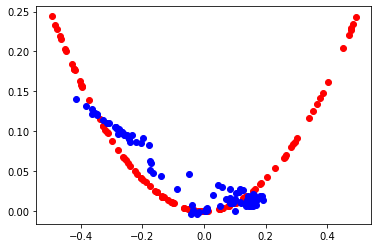

7999  - Generator:  5.823955535888672
Discriminator:  0.5899999737739563 0.5699999928474426



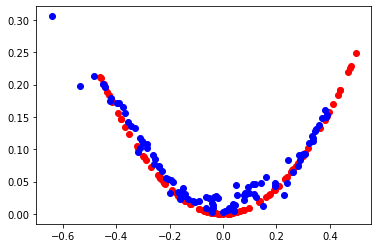

9999  - Generator:  5.5669732093811035
Discriminator:  0.6600000262260437 0.5099999904632568



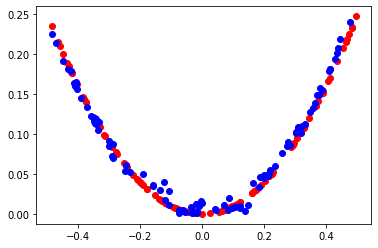

In [ ]:
# train model
train(generator, discriminator, gan_model, latent_dim)